# Coin Segmentation

In [1]:
import skimage
skimage.__version__

'0.13.0'

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import feature
from scipy.ndimage import distance_transform_edt

In [3]:
coins = data.coins()

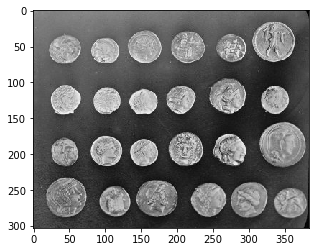

In [6]:
plt.imshow(coins, cmap='gray')

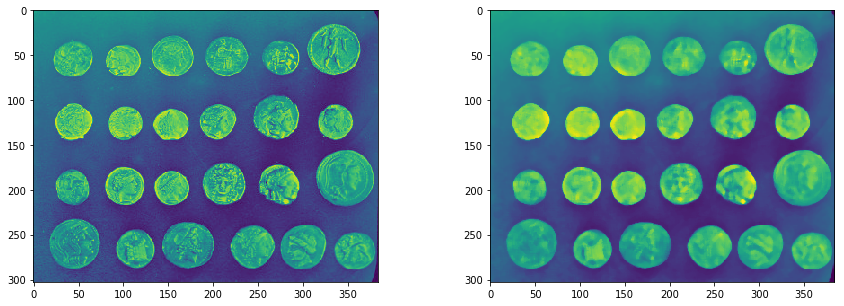

In [7]:
coins_denoised = filters.median(coins, selem= np.ones((5, 5)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
ax0.imshow(coins)
ax1.imshow(coins_denoised)

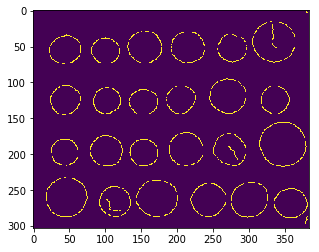

In [15]:
edges = skimage.feature.canny(coins, sigma=3)

plt.imshow(edges)

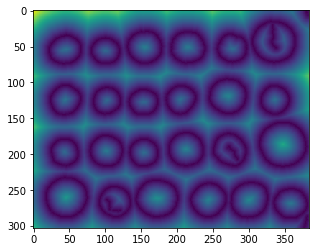

In [17]:
dt = distance_transform_edt(~edges)

plt.imshow(dt)

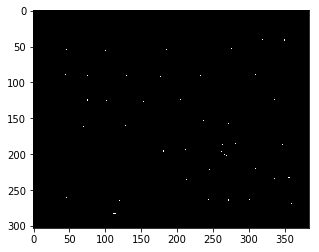

In [18]:
local_max = feature.peak_local_max(dt, indices= False, min_distance=5)
plt.imshow(local_max, cmap='gray')

In [19]:
peak_idx = feature.peak_local_max(dt, indices= True, min_distance=5)
peak_idx[:5]

array([[283, 116],
       [283, 115],
       [283, 114],
       [283, 113],
       [282, 115]], dtype=int64)

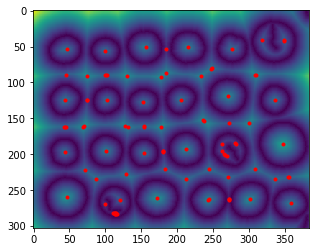

In [20]:
plt.plot(peak_idx[:, 1], peak_idx[:, 0], 'r.')
plt.imshow(dt)

In [21]:
from skimage import measure

markers = measure.label(local_max)

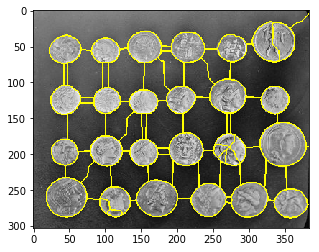

In [22]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(coins, labels))

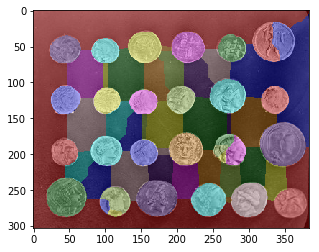

In [23]:
from skimage import color
plt.imshow(color.label2rgb(labels, image=coins))

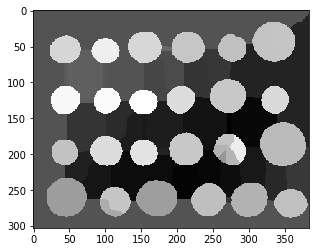

In [24]:
plt.imshow(color.label2rgb(labels, image=coins, kind='avg'), cmap='gray')

In [26]:
measure.regionprops?

In [25]:
regions = measure.regionprops(labels, intensity_image=coins)

(array([  5.,   4.,   7.,   2.,   5.,   2.,   3.,   3.,   1.,   0.,   0.,
          0.,   3.,   2.,   5.,  10.,   2.,   4.,   2.,   3.]),
 array([  29.22758621,   37.51929919,   45.81101217,   54.10272516,
          62.39443814,   70.68615112,   78.9778641 ,   87.26957709,
          95.56129007,  103.85300305,  112.14471603,  120.43642902,
         128.728142  ,  137.01985498,  145.31156796,  153.60328095,
         161.89499393,  170.18670691,  178.4784199 ,  186.77013288,
         195.06184586]),
 <a list of 20 Patch objects>)

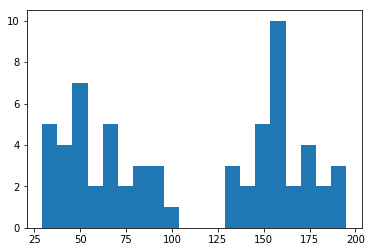

In [27]:
region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20)

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 2)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(region_means)
model.cluster_centers_

array([[  58.87941413],
       [ 160.09282582]])

In [30]:
bg_fg_labels = model.predict(region_means)
bg_fg_labels

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [31]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg    

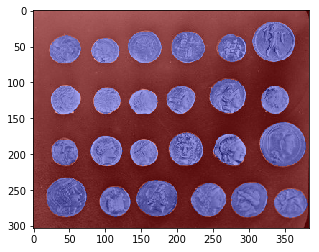

In [32]:
plt.imshow(color.label2rgb(classified_labels, image=coins))